<h1 style = "text-align: right">Advance Python Mini Project</h1>
<h2 style = "text-align: right">Roll No. 16010420139, 16010420133, 16010420141</h2>
<h2 style = "text-align: right">Name: Himanshu, Soumen, Omkar</h2>
<h3 style = "text-align: right">Class: B1</h3>

In [22]:
# All the necessary libraries are being imported and style is assigned to matplotlib graphs.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sc
import math
import seaborn as sns
from IPython.core.display import display, HTML
import matplotlib as mpl
from cycler import cycler
plt.style.use(['dark_background'])

In [23]:
# csv data is read and converted into a dataframe
data = pd.read_csv("googleplaystore.csv")
data.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600000.0,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000000.0,50000,Free,0.0,Everyone,Art & Design,2018-04-26,1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000000.0,1000000,Free,0.0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000000.0,1000000,Free,0.0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100000.0,10000,Free,0.0,Everyone,Art & Design;Creativity,2018-07-03,2.8,4.0.3 and up


<h1><center>Data Cleaning</center></h1>

In [24]:
# NaN values are being checked.
data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [25]:
# 'Rating' is cleaned.
t_data = data[pd.notnull(data['Rating'])]

# Mean is found
mean = np.mean(t_data['Rating'])

print("Mean of ratings excluding null values:", mean)

Mean of ratings excluding null values: 4.189657838778183


In [26]:
# NaN is replaced with mean because there are many missing values in 'Rating' column.
data['Rating'].fillna(round(mean, 1), inplace = True)

# Missing value is not considerable in other columns so the NaN values are dropped.
data.dropna(inplace = True)

In [27]:
# All are non-null here as we can observe.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10345
Data columns (total 13 columns):
App               10346 non-null object
Category          10346 non-null object
Rating            10346 non-null float64
Reviews           10346 non-null int64
Size              10346 non-null float64
Installs          10346 non-null int64
Type              10346 non-null object
Price             10346 non-null float64
Content Rating    10346 non-null object
Genres            10346 non-null object
Last Updated      10346 non-null object
Current Ver       10346 non-null object
Android Ver       10346 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [28]:
# 483 duplicates are present as shown below.
data.duplicated().value_counts()

False    10346
dtype: int64

In [29]:
# All the duplicates are being extracted and deleted.
data.drop_duplicates(inplace = True)

In [30]:
# After the data cleaning and removal of duplicates, we have left with 10346 non-null records.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10346 entries, 0 to 10345
Data columns (total 13 columns):
App               10346 non-null object
Category          10346 non-null object
Rating            10346 non-null float64
Reviews           10346 non-null int64
Size              10346 non-null float64
Installs          10346 non-null int64
Type              10346 non-null object
Price             10346 non-null float64
Content Rating    10346 non-null object
Genres            10346 non-null object
Last Updated      10346 non-null object
Current Ver       10346 non-null object
Android Ver       10346 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [31]:
# Converting the 'Last Updated' column into Pandas date-time object.
data['Last Updated'] = pd.to_datetime(data['Last Updated'])
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [32]:
# Converting 'Installs' column from string to int by replacing ',' and '+' by '' so that type conversion is possible
# manipulation
data['Installs'] = data['Installs'].apply(str).str.replace(',', '').str.replace('+', '').astype('int')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [33]:
# 'Reviews', 'Size' and 'Price' columns types are given.
print(type(data['Reviews'][0]))
print(type(data['Size'][0]))
print(type(data['Price'][0]))

<class 'numpy.int64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [34]:
# 'Reviews' column is converted to int format.
data['Reviews'] = data['Reviews'].astype('int')

type(data['Reviews'][0])

numpy.int32

In [35]:
# Converting 'Size' column to float by replacing 'M' by 'e+6', 'k' by 'e+3' and 'Varies with device' by '0' so that type 
# conversion is possible
data['Size'] = (data['Size'].apply(str).str.replace('M', 'e+6').apply(str).str.replace('k', 'e+3').apply(str).str.replace('Varies with device', '0').astype('float'))
type(data['Size'][0])

numpy.float64

In [36]:
# Converting 'Price' column to float by replacing '$' by '' so that type conversion is possible
data['Price'] = data['Price'].apply(str).str.replace('$', '').astype('float')

type(data['Price'][0])

numpy.float64

In [37]:
# Displaying the final data after successful data cleaning.
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [38]:
data.to_csv('googleplaystore_updated.csv', index = False)

<h1><center>Statistics on Data</center></h1>

In [39]:
# Finding the minimum, maximum, average, median, range, mode, count and variance of the Price of the paid Apps
df = data[data['Type'] == 'Paid']
maximum = np.max(df['Price'])
minimum = np.min(df['Price'])
avg = np.mean(df['Price'])
med = np.median(df['Price'])
r = maximum - minimum
x, y = sc.mode(df['Price'])
count = len(df)
var = np.var(df['Price'])

print("Maximum Price of an App on Play Store: $" + str(maximum))
print("Minimum Price of an App on Play Store: $" + str(minimum))
print("Average Price of an App on Play Store: $" + str(round(avg, 2)))
print("Median of Price of Apps on Play Store: $" + str(round(med, 2)))
print("Range of Price of  Apps on Play Store: $" + str(r))
print("Variance of Price of Apps on Play Store: $" + str(round(var, 2)))
print("Most occuring Price of App on Play Store (mode): $" + str(x[0]) + " which occurs " + str(y[0]) + " times")
print("There are " + str(count) + " Paid Apps on Play Store")

Maximum Price of an App on Play Store: $400.0
Minimum Price of an App on Play Store: $0.99
Average Price of an App on Play Store: $14.01
Median of Price of Apps on Play Store: $2.99
Range of Price of  Apps on Play Store: $399.01
Variance of Price of Apps on Play Store: $3419.68
Most occuring Price of App on Play Store (mode): $0.99 which occurs 144 times
There are 762 Paid Apps on Play Store


### From the above statistics, we can see that the average Price of paid Apps on the Play Store is closer to the minimum price rather than maximum.

### Also the most occuring price is 0.99 dollars which is also the minimum price, hence we can say that most paid apps are inexpensive.

In [40]:
# Finding the minimum, maximum, average, median, range, mode, count and variance of the number of installs of all apps
df = data
maximum = np.max(df['Installs'])
minimum = np.min(df['Installs'])
avg = np.mean(df['Installs'])
med = np.median(df['Installs'])
r = maximum - minimum
var = np.var(df['Installs'])

print("Maximum number of installs of an App on Play Store: " + str(maximum))
print("Minimum number of installs of an App on Play Store: " + str(minimum))
print("Average number of installs of an App on Play Store: " + str(round(avg, 2)))
print("Median of number of installs of Apps on Play Store: " + str(round(med, 2)))
print("Range of number of installs of  Apps on Play Store: " + str(r))
print("Variance of number of installs of Apps on Play Store: " + str(round(var, 2)))

Maximum number of installs of an App on Play Store: 1000000000
Minimum number of installs of an App on Play Store: 0
Average number of installs of an App on Play Store: 14172659.72
Median of number of installs of Apps on Play Store: 100000.0
Range of number of installs of  Apps on Play Store: 1000000000
Variance of number of installs of Apps on Play Store: 6444399933509178.0


### This data shows us that there exist apps which have no installs.

### There is a lot of discrepancy between average and the median value which shows us that the data for number of installs is not increasing linearly.

<h1><center>Data Visualisation</center></h1>

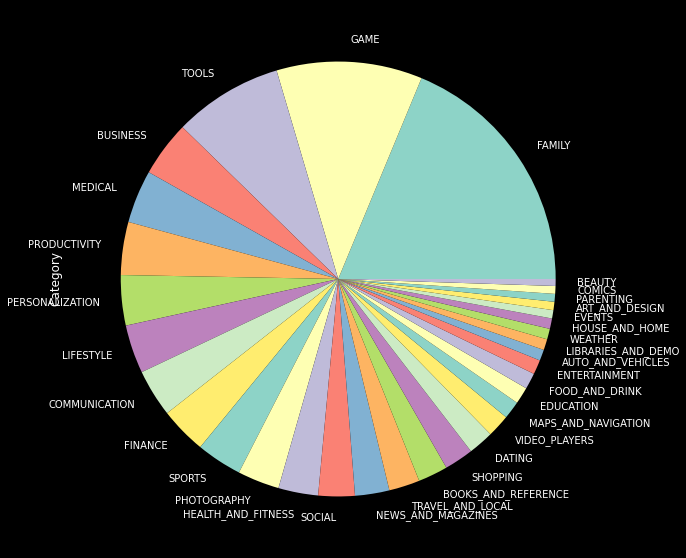

In [185]:
# Most popular category 
plt.figure(figsize=(40,10))
data['Category'].value_counts().plot(kind='pie')
plt.show()

### As we can clearly see from the pie chart, 'Family' category has the maximum number of Apps followed by the 'Games' category

### We used this Visualisation so developers can use this information in making their Apps

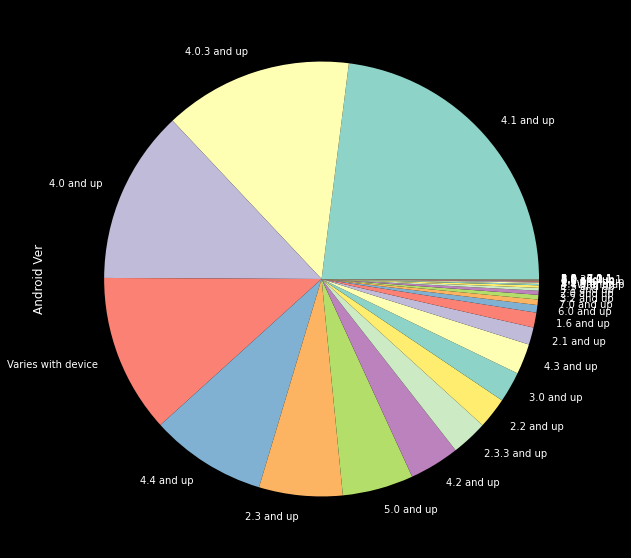

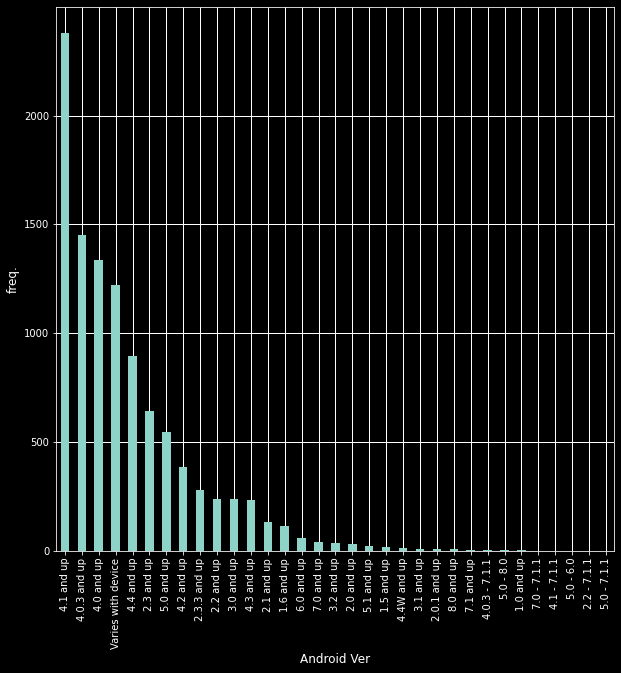

In [186]:
plt.figure(figsize=(40,10))
data['Android Ver'].value_counts().plot(kind='pie')
plt.show()
plt.figure(figsize=(10,10))
data['Android Ver'].value_counts().plot(kind='bar')
plt.xlabel('Android Ver')
plt.ylabel('freq.')
plt.show()

In [187]:
display(HTML('<h2>As we can see from this pie chart most apps are supported on android version of 4.1 and above.</h2>'))
display(HTML('<h2>Android versions 2.3, 4.4, 4.0 and 4.0.3 and above for all also have a high amount of support for apps.</h2>'))
display(HTML('<h2>Many other apps have a altering nature for their supported android versions where it varies from device to device.</h2>'))

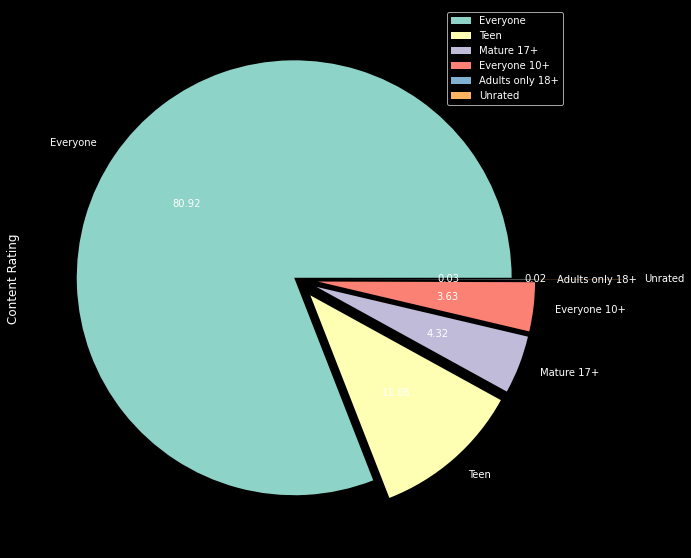

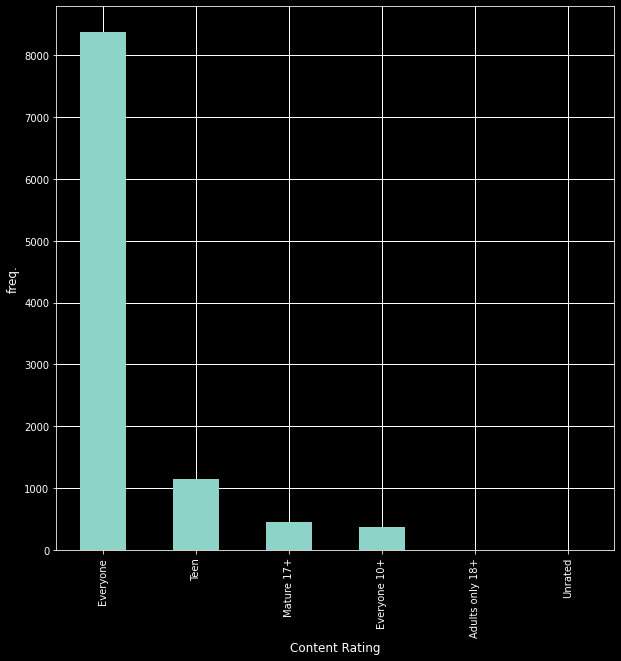

In [188]:
# Content Rating 
plt.figure(figsize=(40,10))
explode=[0.01,0.1,0.1,0.1,0.1,0.5]
data['Content Rating'].value_counts().plot(kind='pie',autopct="%.2f",explode=explode)
plt.legend()
plt.show()
plt.figure(figsize=(10,10))
data['Content Rating'].value_counts().plot(kind='bar')
plt.xlabel('Content Rating')
plt.ylabel('freq.')
plt.show()

### This pie chart and bar graph shows that maximum number of Apps on the Play Store are rated to be used by 'Everyone', followed by 'Teen', '17+' etc whereas hardly any apps are rated for 'Adults only' or 'Unrated'

### We used this Visualisation so developers can use this information in making their Apps, hence making an App for everyone is bound for more succcess

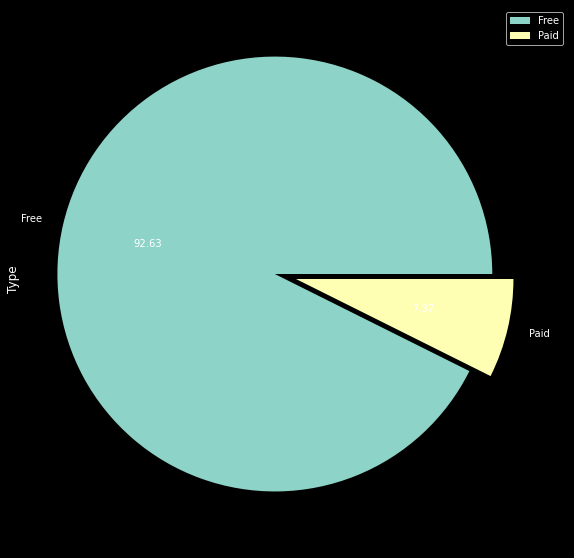

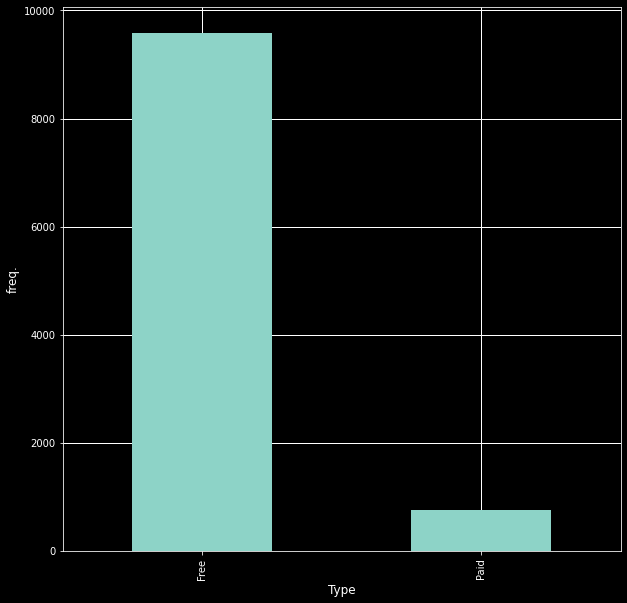

In [189]:
# Comparing Type of Apps: 'Free' or 'Paid'
plt.figure(figsize=(10,10))
explode=[0.1,0]
data['Type'].value_counts().plot(kind='pie',autopct="%.2f",explode=explode)
plt.legend()
plt.show()
plt.figure(figsize=(10,10))
data['Type'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('freq.')
plt.show()

### The graphs show that almost 93% of Apps are free on the Google Play store

### We used this Visualisation so developers can use this information in making their Apps, hence making a  free App is much better

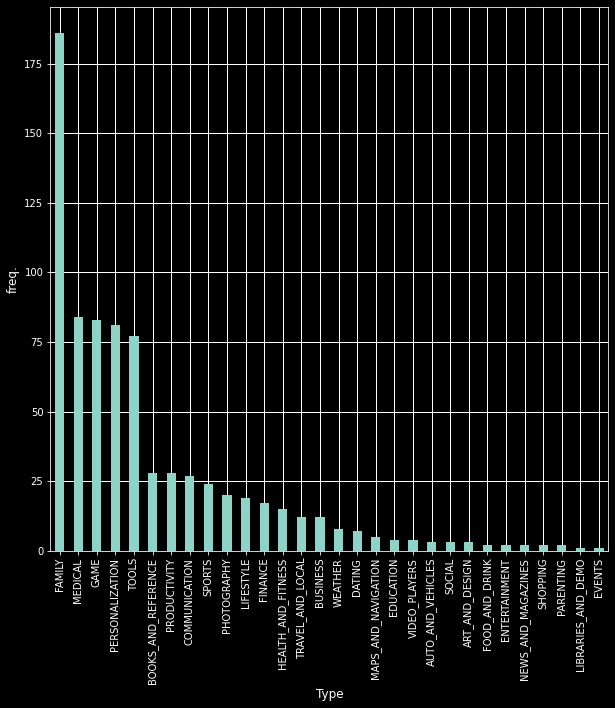

In [190]:
# Determining which category has maximum number of paid Apps
df = data[data['Type'] == 'Paid']
plt.figure(figsize=(10,10))
df['Category'].value_counts().plot(kind='bar')
plt.xlabel('Type')
plt.ylabel('freq.')
plt.show()

### As we can see 'Family' Category has maximum number of paid Apps, followed by  'Medical', 'Game' etc

### We used this Visualisation for those developers who surely want to make a paid as this chart shows which Paid App Category are most popular

In [191]:
# Determining which Apps are installed the max number of times
data[data['Installs'] == data['Installs'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
151,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,0.0,1000000000,Free,0.0,Teen,Books & Reference,2018-08-03,Varies with device,Varies with device
301,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
302,WhatsApp Messenger,COMMUNICATION,4.4,69119316,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
304,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
306,Gmail,COMMUNICATION,4.3,4604324,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-02,Varies with device,Varies with device
307,Hangouts,COMMUNICATION,4.0,3419249,0.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
347,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device
351,Hangouts,COMMUNICATION,4.0,3419433,0.0,1000000000,Free,0.0,Everyone,Communication,2018-07-21,Varies with device,Varies with device
356,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
374,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9643041,0.0,1000000000,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device


In [192]:
# Most reviewed App
data[data['Reviews'] == data['Reviews'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2244,Facebook,SOCIAL,4.1,78158306,0.0,1000000000,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device


In [193]:
display(HTML('<h2>As we can see Facebook is the App that has most number of reviews</h2>'))

In [194]:
#Biggest apps with respect to size.
data[data['Size'] == data['Size'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
931,Post Bank,FINANCE,4.5,60449,100000000.0,1000000,Free,0.00,Everyone,Finance,2018-07-23,2.9.12,4.0 and up
1364,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100000000.0,10000000,Free,0.00,Everyone,Lifestyle;Pretend Play,2018-07-16,9.0,4.0 and up
1544,Hungry Shark Evolution,GAME,4.5,6074334,100000000.0,100000000,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up
1576,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100000000.0,5000000,Free,0.00,Everyone,Sports,2018-07-20,3.04.1,4.0.3 and up
1758,Hungry Shark Evolution,GAME,4.5,6074627,100000000.0,100000000,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up
2039,Navi Radiography Pro,MEDICAL,4.7,11,100000000.0,500,Paid,15.99,Everyone,Medical,2018-01-14,1.2.0,4.0.3 and up
3524,Hungry Shark Evolution,GAME,4.5,6071542,100000000.0,100000000,Free,0.00,Teen,Arcade,2018-07-25,6.0.0,4.1 and up
4231,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100000000.0,5000,Free,0.00,Everyone,Health & Fitness,2018-08-02,2.0.0.11,5.0 and up
4967,Ultimate Tennis,SPORTS,4.3,183004,100000000.0,10000000,Free,0.00,Everyone,Sports,2018-07-19,2.29.3118,4.0.3 and up
5070,The Walking Dead: Our World,GAME,4.0,22435,100000000.0,1000000,Free,0.00,Teen,Action,2018-08-01,1.1.0.3,5.0 and up


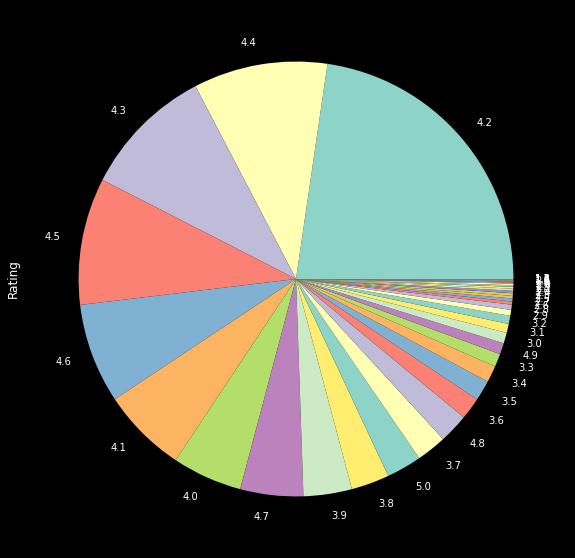

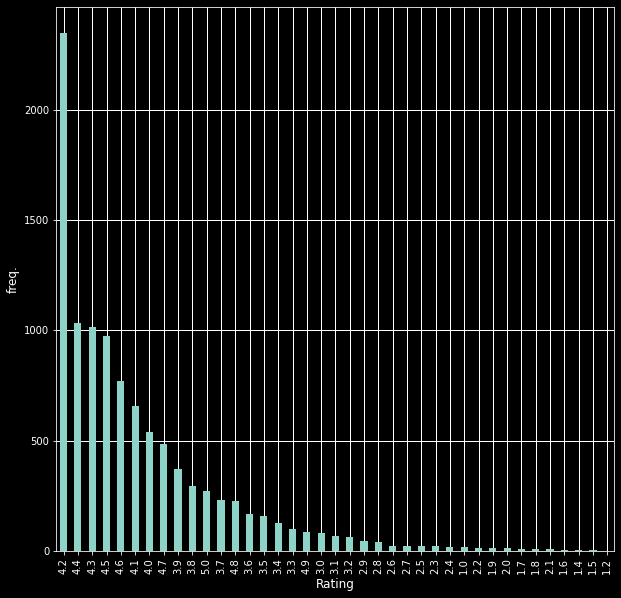

In [195]:
#Highest rated app.
plt.figure(figsize=(40,10))
data['Rating'].value_counts().plot(kind='pie')
plt.show()
plt.figure(figsize=(10,10))
data['Rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('freq.')
plt.show()

<h2>The most frequent number of rating given is 4.2 </h2>
<h2>5 star ratings are quite less.</h2>

In [196]:
#The highest rated apps.

data[data['Rating'] == data['Rating'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
295,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000000.0,1000,Free,0.0,Everyone,Comics,2018-06-26,2.0,4.0.3 and up
545,American Girls Mobile Numbers,DATING,5.0,5,4400000.0,1000,Free,0.0,Mature 17+,Dating,2018-07-17,3.0,4.0.3 and up
548,Awake Dating,DATING,5.0,2,70000000.0,100,Free,0.0,Mature 17+,Dating,2018-07-24,2.2.9,4.4 and up
566,Spine- The dating app,DATING,5.0,5,9300000.0,500,Free,0.0,Teen,Dating,2018-07-14,4.0,4.0.3 and up
569,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5000000.0,100,Free,0.0,Mature 17+,Dating,2018-08-01,8.2,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10227,Mad Dash Fo' Cash,GAME,5.0,14,16000000.0,100,Free,0.0,Everyone,Arcade,2017-06-19,2.5a,4.1 and up
10248,GKPB FP Online Church,LIFESTYLE,5.0,32,7900000.0,1000,Free,0.0,Everyone,Lifestyle,2017-12-31,0.7.1,4.4 and up
10281,Monster Ride Pro,GAME,5.0,1,24000000.0,10,Free,0.0,Everyone,Racing,2018-03-05,2.0,2.3 and up
10325,Fr. Daoud Lamei,FAMILY,5.0,22,8600000.0,1000,Free,0.0,Teen,Education,2018-06-27,3.8.0,4.1 and up


In [197]:
display(HTML('<h2>The following are the highest rated apps that is 5.0</h2>'))

In [198]:
#Costliest Apps
data[data['Price'] == data['Price'].max()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
3911,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300000.0,10000,Paid,400.0,Everyone,Lifestyle,2018-05-03,1.0.1,4.1 and up


In [199]:
display(HTML('<h2>Im Rich - Trump Edition from lifestyle category is the costliest app</h2>'))

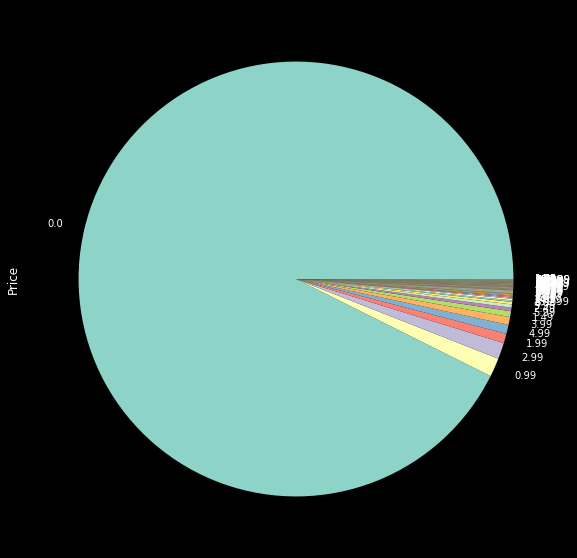

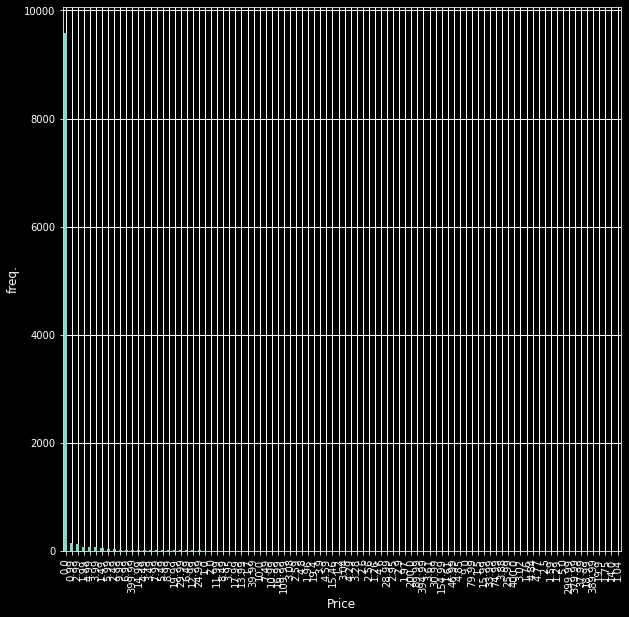

In [200]:
#Highest rated app.
plt.figure(figsize=(40,10))
data['Price'].value_counts().plot(kind='pie')
plt.show()
plt.figure(figsize=(10,10))
data['Price'].value_counts().plot(kind='bar')
plt.xlabel('Price')
plt.ylabel('freq.')
plt.show()

In [201]:
display(HTML('<h2>Price comparison with its frequency</h2>'))

Text(0.5, 1.0, 'Most Popular Apps in Family Category')

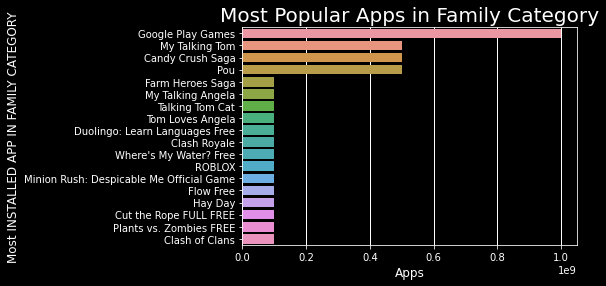

In [202]:
# Most Popular Apps in 'Family' Category

data_cat = data[data['Category'] == 'FAMILY'].sort_values(['Installs'], ascending = 0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('Apps')
ax.set_ylabel('Most INSTALLED APP IN FAMILY CATEGORY')
ax.set_title("Most Popular Apps in Family Category", size = 20)

### "Google Play Games" has the most number of installs which is obvious as every game needs it to be installed by default and the proceeding apps have significantly less number of installs

Text(0.5, 1.0, 'Most Popular Apps in Family Category')

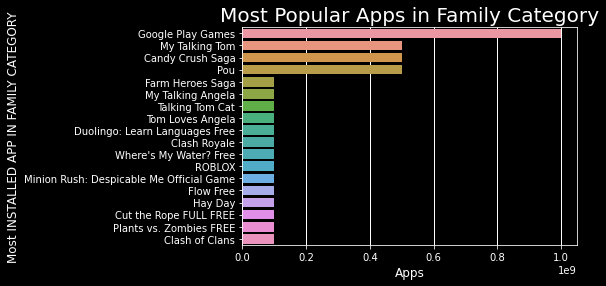

In [203]:
data_cat = data[data['Category'] == 'FAMILY'].sort_values(['Installs'], ascending = 0)[:20]

ax = sns.barplot(x = 'Installs' , y = 'App' , data = data_cat )
ax.set_xlabel('Apps')
ax.set_ylabel('Most INSTALLED APP IN FAMILY CATEGORY')
ax.set_title("Most Popular Apps in Family Category", size = 20)

Text(0.5, 1.0, 'Most Popular Apps in Game Category')

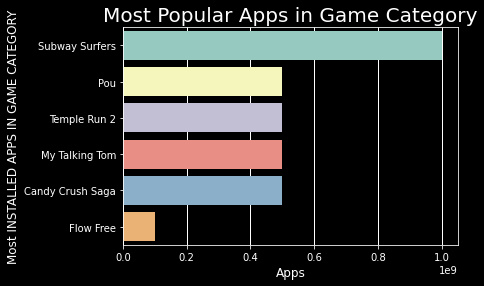

In [204]:
# Most Popular Apps in 'Games' Category

data_cat = data[data['Category'] =='GAME'].sort_values(['Installs'], ascending = 0)[:20]

ax = sns.barplot(x = 'Installs', y = 'App', data = data_cat )
ax.set_xlabel('Apps')
ax.set_ylabel('Most INSTALLED APPS IN GAME CATEGORY')
ax.set_title("Most Popular Apps in Game Category", size = 20)

### This Chart shows that "Subway Surfers" is the most popular game on the Play Store 

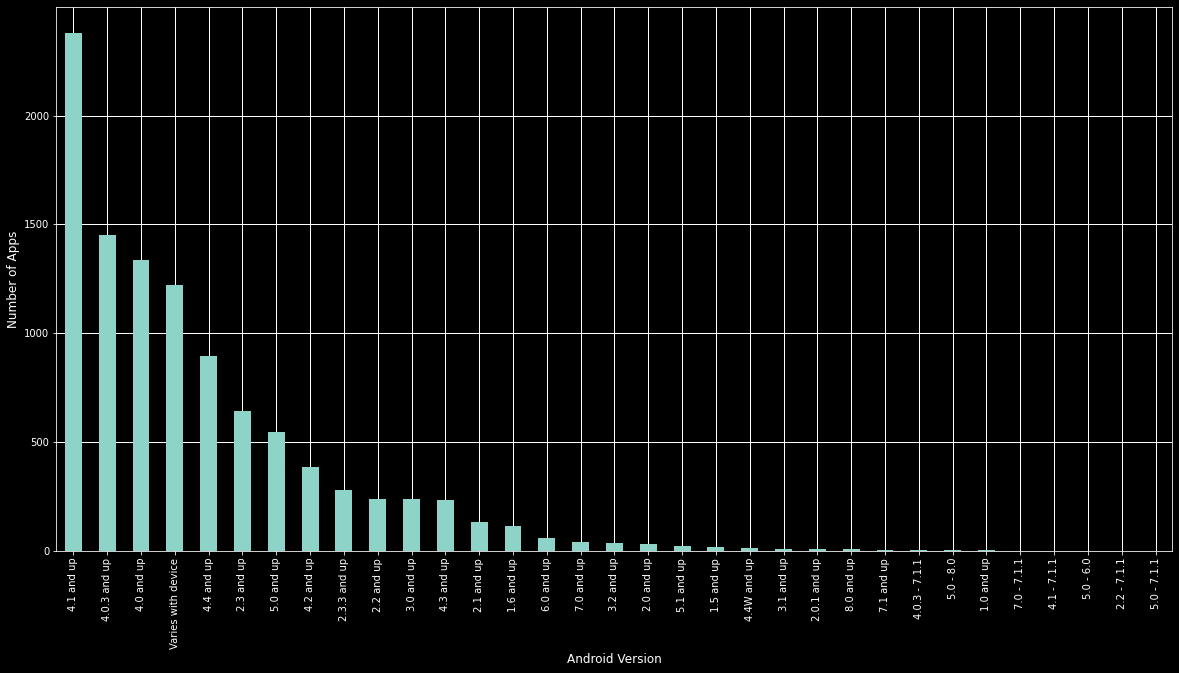

In [205]:
# Android version which is most compatible with Apps on Play Store
plt.figure(figsize = (20,10))
data['Android Ver'].value_counts().plot(kind = 'bar')
plt.xlabel('Android Version')
plt.ylabel('Number of Apps')

plt.show()

### As we can see most Apps are compatible with devices running Android 4.1 and above

### We used this Visualisation so that developers can use this information to optimise their Apps to run with devices running Android 4.1 and above

Text(0.5, 1.0, 'Most Popular Apps Except the Games Category')

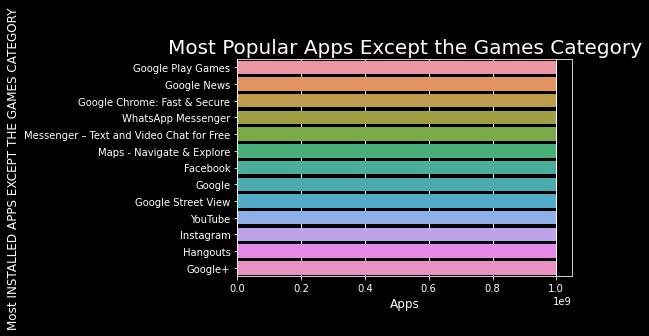

In [206]:
# Most Popular Apps overall except the 'Games' Category.

data_cat = data[data['Category'] != 'GAME'].sort_values(['Installs'], ascending = 0)[:20]

ax = sns.barplot(x = 'Installs', y = 'App', data = data_cat )
ax.set_xlabel('Apps')
ax.set_ylabel('Most INSTALLED APPS EXCEPT THE GAMES CATEGORY')
ax.set_title("Most Popular Apps Except the Games Category", size = 20)

In [207]:
display(HTML('<h2>This Chart shows that "Google Play Games" is the most popular app on the Play Store except for games</h2>'))


<br>
<br>

<h2 style = "text-align: right">END OF PROJECT</h2>
<h2 style = "text-align: right">Thank you!</h2>